In this notebook, we understand the intuition behind similarities between sentences, including dot product and cosine similarity.

Read the accompanying [blog post here](https://txt.cohere.ai/what-is-similarity-between-sentences/).

In [ ]:
! pip install cohere altair > /dev/null

In [ ]:
import cohere
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

api_key = '' # Paste your API key here. Remember to not share it publicly 
co = cohere.Client(api_key)

## Turn text into embeddings

In [ ]:
sentence1 = np.array(co.embed(["I like to be in my house"]).embeddings)
sentence2 = np.array(co.embed(["I enjoy staying home"]).embeddings)
sentence3 = np.array(co.embed(["the isotope 238u decays to 206pb"]).embeddings)

In [ ]:
print("Embedding for sentence 1", sentence1)
print("Embedding for sentence 2", sentence2)
print("Embedding for sentence 3", sentence3)

Embedding for sentence 1 [[-1.3662109  -0.53759766  0.06109619 ...  0.60839844 -0.2902832
   0.68408203]]
Embedding for sentence 2 [[-0.38427734  2.3808594   2.5527344  ...  0.12353516 -0.91259766
   0.6542969 ]]
Embedding for sentence 3 [[-1.1621094  -1.9238281  -1.1611328  ... -2.9785156   1.5751953
   0.15478516]]


## Calculate dot products

In [ ]:
from numpy import dot
print("Similarity between sentences 1 and 2:", dot(sentence1[0], sentence2[0]))
print("Similarity between sentences 1 and 3:", dot(sentence1[0], sentence3[0]))
print("Similarity between sentences 2 and 3:", dot(sentence2[0], sentence3[0]))

Similarity between sentences 1 and 2: 6738.2858668486715
Similarity between sentences 1 and 3: -122.22666955510499
Similarity between sentences 2 and 3: -3.494608113647928


In [ ]:
print("Similarity between sentences 1 and 1:", np.dot(sentence1[0], sentence1[0]))
print("Similarity between sentences 2 and 2:", np.dot(sentence2[0], sentence2[0]))
print("Similarity between sentences 3 and 3:", np.dot(sentence3[0], sentence3[0]))

Similarity between sentences 1 and 1: 8709.117812702145
Similarity between sentences 2 and 2: 8703.38120899619
Similarity between sentences 3 and 3: 7978.303206108623


## Calculate cosine similarities

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity between sentences 1 and 2:", cosine_similarity(sentence1, sentence2)[0][0])
print("Cosine similarity between sentences 1 and 3:", cosine_similarity(sentence1, sentence3)[0][0])
print("Cosine similarity between sentences 2 and 3:", cosine_similarity(sentence2, sentence3)[0][0])

Cosine similarity between sentences 1 and 2: 0.7739596968978093
Cosine similarity between sentences 1 and 3: -0.014663026750986932
Cosine similarity between sentences 2 and 3: -0.00041937178612739233


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity between sentences 1 and 1:", cosine_similarity(sentence1, sentence1)[0][0])
print("Cosine similarity between sentences 2 and 2:", cosine_similarity(sentence2, sentence2)[0][0])
print("Cosine similarity between sentences 3 and 3:", cosine_similarity(sentence3, sentence3)[0][0])

Cosine similarity between sentences 1 and 1: 1.0000000000000009
Cosine similarity between sentences 2 and 2: 1.0000000000000016
Cosine similarity between sentences 3 and 3: 0.9999999999999996


[Text(0.5, 0, 'I like to be in my house'),
 Text(1.5, 0, 'I enjoy staying home'),
 Text(2.5, 0, 'the isotope 238u decays to 206pb')]

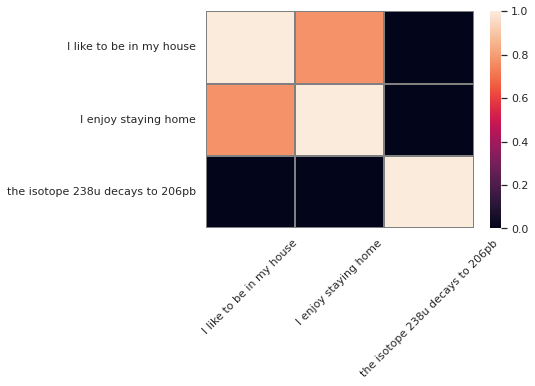

In [ ]:
embeddings = [sentence1, sentence2, sentence3]
dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,
                 linewidths=1, linecolor='grey',
                 xticklabels=["I like to be in my house", "I enjoy staying home", "the isotope 238u decays to 206pb"],
                 yticklabels=["I like to be in my house", "I enjoy staying home", "the isotope 238u decays to 206pb"],
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
